Installation des bibliothèques essentielles :

In [ ]:
# Installation via pip
!pip install pandas numpy matplotlib seaborn scikit-learn jupyter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.1 MB/s eta 0:00:00


| Rang mondial (2024) | Pays        | PIB nominal estimé 2024 (milliards USD) |
| ------------------- | ----------- | --------------------------------------- |
| 1                   | États-Unis  | ~ 29 184,9 ([Wikipedia][1])             |
| 2                   | Chine       | ~ 18 749,8 ([Statistics Times][2])      |
| 3                   | Allemagne   | ~ 5 013,6 ([Wikipedia][3])              |
| 4                   | Japon       | ~ 4 279,8 ([Wikipedia][3])              |
| 5                   | Inde        | ~ 4 125,2 ([Wikipedia][3])              |
| 6                   | Royaume-Uni | ~ 3 958,8 ([Wikipedia][3])              |
| 7                   | France      | ~ 3 361,6 ([Wikipedia][3])              |
| 8                   | Italie      | ~ 2 543,7 ([Wikipedia][3])              |
| 9                   | Russie      | ~ 2 540,7 ([Wikipedia][3])              |
| 10                  | Canada      | ~ 2 283,6 ([Wikipedia][3])              |

[1]: https://en.wikipedia.org/wiki/List_of_North_American_countries_by_GDP_%28nominal%29?utm_source=chatgpt.com "List of North American countries by GDP (nominal)"
[2]: https://statisticstimes.com/economy/projected-world-gdp-ranking.php?utm_source=chatgpt.com "World GDP Ranking 2025 - StatisticsTimes.com"
[3]: https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28nominal%29?utm_source=chatgpt.com "List of countries by GDP (nominal)"


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger un dataset en ligne (exemple : ventes d'une entreprise)
url = "https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv"
df = pd.read_csv(url)

In [18]:
df

,Country Name,Country Code,Year,Value
0,Afghanistan,AFG,2000,3.521418e+09
1,Afghanistan,AFG,2001,2.813572e+09
2,Afghanistan,AFG,2002,3.825701e+09
3,Afghanistan,AFG,2003,4.520947e+09
4,Afghanistan,AFG,2004,5.224897e+09
...,...,...,...,...
13974,Zimbabwe,ZWE,2019,2.183223e+10
13975,Zimbabwe,ZWE,2020,2.150970e+10
13976,Zimbabwe,ZWE,2021,2.837124e+10
13977,Zimbabwe,ZWE,2022,2.736663e+10


In [19]:
# Afficher les premières lignes
print(df.head())

  Country Name Country Code  Year         Value
0  Afghanistan          AFG  2000  3.521418e+09
1  Afghanistan          AFG  2001  2.813572e+09
2  Afghanistan          AFG  2002  3.825701e+09
3  Afghanistan          AFG  2003  4.520947e+09
4  Afghanistan          AFG  2004  5.224897e+09


In [20]:
# Informations sur le dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979 entries, 0 to 13978
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  13979 non-null  object 
 1   Country Code  13979 non-null  object 
 2   Year          13979 non-null  int64  
 3   Value         13979 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 437.0+ KB
None


# Statistiques descriptives
print(df.describe())


NameError: name 'colonne' is not defined

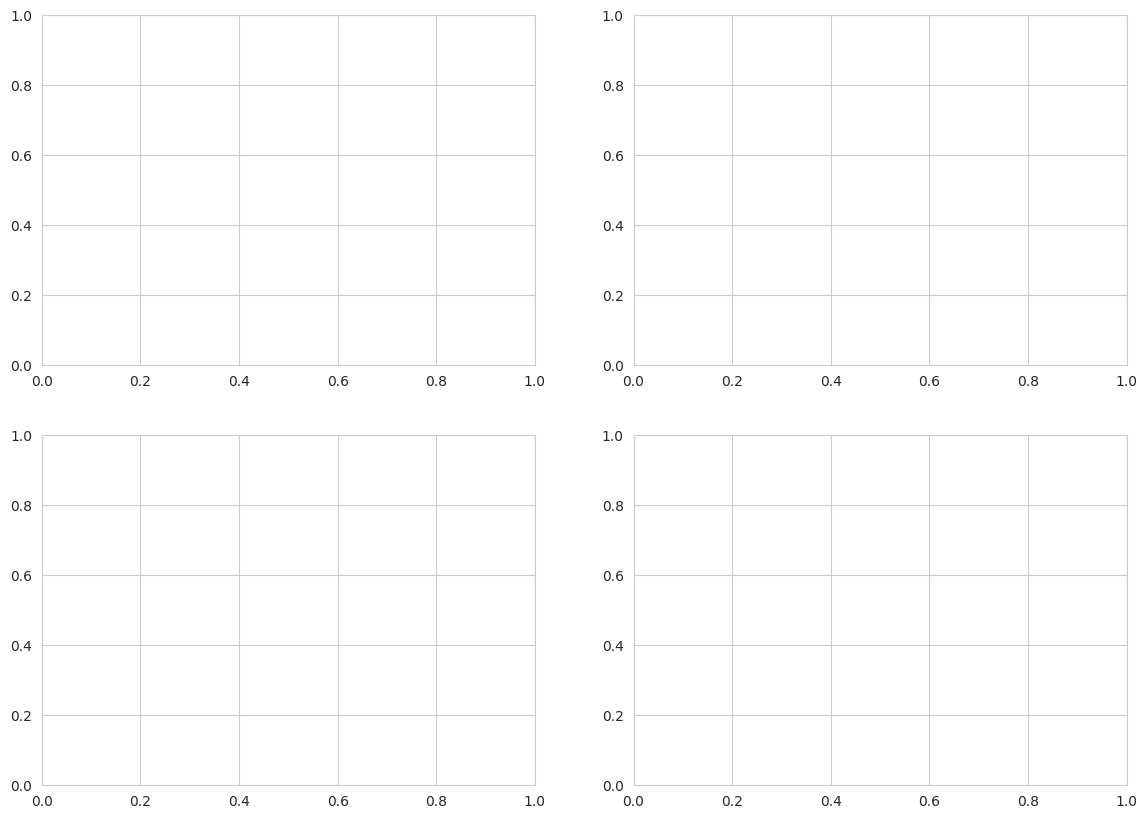

In [22]:
# Configuration du style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Créer une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histogramme
axes[0, 0].hist(colonne, bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution des valeurs', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Valeur')
axes[0, 0].set_ylabel('Fréquence')

# Ajouter la moyenne et la médiane
axes[0, 0].axvline(colonne.mean(), color='red', linestyle='--',
                   label=f'Moyenne: {colonne.mean():.2f}')
axes[0, 0].axvline(colonne.median(), color='green', linestyle='--',
                   label=f'Médiane: {colonne.median():.2f}')
axes[0, 0].legend()

# 2. Boxplot
axes[0, 1].boxplot(colonne.dropna(), vert=True)
axes[0, 1].set_title('Boxplot - Détection des outliers', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Valeur')

# 3. Densité
colonne.plot(kind='density', ax=axes[1, 0])
axes[1, 0].set_title('Courbe de densité', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Valeur')

# 4. QQ-plot (pour tester la normalité)
from scipy import stats
stats.probplot(colonne.dropna(), dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Test de normalité)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()